_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [1]:
#!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
## Import libraries
# File Handling
import wget
import os.path
from os import path

# Data
import pandas as pd
import numpy as np

In [6]:
## Initialize Download Function
def downloadFile(url, name=None):
    '''
    Check if file exists and download to working directory if it does not. Returns str of filename given to file.
    2019-07-15: Added tar.gz awareness - needs work...
    '''
    split_url = url_split = url.split('/')
    if len(split_url) > 2:
        filename = url_split[len(url_split)-len(split_url)-1]
    else:
        filename =url_split[len(url_split)-len(split_url)-1]
    
    if path.exists(filename):
        print('File already exists')
    else:
        try:
            filename = wget.download(url, out=name)
            print(filename, 'successfully downloaded')
        except:
            print('File could not be downloaded.  Check URL & connection.')
    return filename

downloadFile("https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz", name="instacart.tar.gz")

File could not be downloaded.  Check URL & connection.


'instacart_online_grocery_shopping_2017_05_01.tar.gz'

In [8]:
## Unzip file - Complete later.  Manually unzipped file.
import gzip

output = open("/instacart", 'wb')

with gzip.open('instacart.tar.gz', 'rb') as f:
    file_content = f.read()
    output.write(s)
    output.close()
    f.close()
print('done')

PermissionError: [Errno 13] Permission denied: '/instacart'

In [3]:
## Make file aware
%cd instacart_2017_05_01

C:\Users\vince\Desktop\lambdaschool_temp\week2\DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling\module1-join-and-reshape-data\instacart_2017_05_01


In [10]:
## Make aware of below
!ls -lh *.csv

'ls' is not recognized as an internal or external command,
operable program or batch file.


# Join Datasets

## Goal: Reproduce this example

The first two orders for user id 1:

In [11]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

## Load data

Here's a list of all six CSV filenames

In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

### aisles

In [10]:
aisle = pd.read_csv("aisles.csv")
aisle.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### departments

In [11]:
department = pd.read_csv("departments.csv")
department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### order_products__prior

In [12]:
order_products_prior = pd.read_csv("order_products_prior.csv")
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


### order_products__train

In [13]:
order_products_train = pd.read_csv("order_products_train.csv")
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


### orders

In [14]:
orders = pd.read_csv("orders.csv")
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


### products

In [15]:
products = pd.read_csv("products.csv")
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## Concatenate order_products__prior and order_products__train

In [16]:
order_products = pd.concat([order_products_prior, order_products_train])
assert len(order_products) == len(order_products_prior) + len(order_products_train)
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


## Get a subset of orders — the first two orders for user id 1

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

In [17]:
## Example of conditional series passed as index lookup
condition = order_products['product_id'] == 9327
print(type(condition))
order_products[condition].head()

<class 'pandas.core.series.Series'>


,order_id,product_id,add_to_cart_order,reordered
2,2,9327,3,0
527,63,9327,3,0
3979,420,9327,8,1
20356,2160,9327,15,0
34960,3653,9327,10,0


In [18]:
## Getting the first two orders from orders, user_id==1
condition = (orders['user_id'] == 1) & (orders['order_number'] <= 2)
subset = orders[condition][:2]

## Merge dataframes

Merge the subset from `orders` with columns from `order_products`

In [19]:
# order_id
# product_id
# add_to_cart_order

columns = ['order_id', 'product_id', 'add_to_cart_order']

merged = pd.merge(subset, order_products[columns], how='inner', on='order_id')

merged.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order
0,2539329,1,prior,1,2,8,NaN,196,1
1,2539329,1,prior,1,2,8,NaN,14084,2
2,2539329,1,prior,1,2,8,NaN,12427,3
3,2539329,1,prior,1,2,8,NaN,26088,4
4,2539329,1,prior,1,2,8,NaN,26405,5


Merge with columns from `products`

In [20]:
final = pd.merge(merged, products[['product_id', 'product_name']], how='inner', on='product_id')

final.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name
0,2539329,1,prior,1,2,8,NaN,196,1,Soda
1,2398795,1,prior,2,3,7,15.0,196,1,Soda
2,2539329,1,prior,1,2,8,NaN,14084,2,Organic Unsweetened Vanilla Almond Milk
3,2539329,1,prior,1,2,8,NaN,12427,3,Original Beef Jerky
4,2398795,1,prior,2,3,7,15.0,12427,3,Original Beef Jerky


# Reshape Datasets

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [31]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [32]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [39]:
## Let's reset the index so name becomes a variable
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [40]:
tidy = table1.melt(id_vars='index')
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


## Table 2 --> Tidy

In [1]:
##### LEAVE BLANK --an assignment exercise #####
## We can reshape
display(table2)
tidy2 = table2.unstack()
tidy2 = tidy2.reset_index()
tidy2.columns = ['Name', 'Treatment', 'Value']

NameError: name 'table2' is not defined

## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [69]:
tidy.pivot_table(index='index', columns='variable', values='value')

variable,treatmenta,treatmentb
index,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Tidy --> Table 2

In [73]:
##### LEAVE BLANK --an assignment exercise #####
tidy.pivot_table(index='variable', columns='index', values='value')

index,Jane Doe,John Smith,Mary Johnson
variable,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


# Seaborn example

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

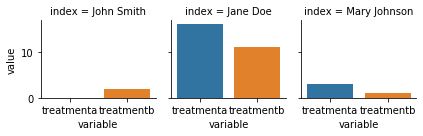

In [76]:
sns.catplot(x='variable', y='value', col='index', 
            kind='bar', data=tidy, height=2);

## Now with Instacart data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import os
path = 'instacart_2017_05_01'
print(os.listdir(path))

['._aisles.csv', '._departments.csv', '._orders.csv', '._order_products__prior.csv', '._order_products__train.csv', '._products.csv', 'aisles.csv', 'departments.csv', 'orders.csv', 'order_products_prior.csv', 'order_products_train.csv', 'products.csv']


In [2]:
import os

class ChDir(object):
    """
    Step into a directory temporarily.
    """
    def __init__(self, path):
        self.old_dir = os.getcwd()
        self.new_dir = path

    def __enter__(self):
        os.chdir(self.new_dir)

    def __exit__(self, *args):
        os.chdir(self.old_dir)

In [3]:
with ChDir(path+'/'):
    products = pd.read_csv('products.csv')
    orders = pd.read_csv('orders.csv')
    order_products = pd.concat([pd.read_csv('order_products_prior.csv'), 
                                pd.read_csv('order_products_train.csv')])

In [4]:
## Making the dataframes more efficient
print(orders.dtypes)
orders.head()

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
## user_id is always positive.  All the IDs are.  We can downcast everything to unsigned int32
down_list = ['order_id', 'user_id', 'order_number', 'order_hour_of_day']
for field in down_list:
    orders[field] = pd.to_numeric(orders[field], downcast='unsigned')

In [6]:
orders = orders[down_list]
orders.dtypes

order_id             uint32
user_id              uint32
order_number          uint8
order_hour_of_day     uint8
dtype: object

In [7]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
## We can cast product down.
down_list = ['product_id']
for field in down_list:
    products[field] = pd.to_numeric(products[field], downcast='unsigned')
products = products[['product_id', 'product_name']]
products.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [9]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
## Can downcast the two columns we'll need and drop the rest
down_list = ['order_id', 'product_id']
for field in down_list:
    order_products[field] = pd.to_numeric(order_products[field], downcast='unsigned')
order_products = order_products[down_list]
order_products.head()

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [11]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

In [12]:
## Taking a cue, let's look at order_products
display(orders.head(), order_products.head(), products.head())

,order_id,user_id,order_number,order_hour_of_day
0,2539329,1,1,8
1,2398795,1,2,7
2,473747,1,3,12
3,2254736,1,4,7
4,431534,1,5,15


,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [13]:
## So, we'll want the order_id, product_id from order_products.
## We can merge them to order_id, order_hour_of_day from orders
## To that, we can add prodcut_names from products

subseta = order_products[['order_id', 'product_id']]
subsetb = orders[['order_id', 'order_hour_of_day']]
subsetc = products[['product_id', 'product_name']]

In [14]:
## a+b on order_id
df1 = pd.merge(subseta, subsetb, how='inner', 
         on='order_id')

In [15]:
df1.head()

,order_id,product_id,order_hour_of_day
0,2,33120,9
1,2,28985,9
2,2,9327,9
3,2,45918,9
4,2,30035,9


In [16]:
## (a+b) + c on product_id (many to one)
df1 = pd.merge(df1, subsetc, how='inner',
              on='product_id')

In [17]:
df1.head()

,order_id,product_id,order_hour_of_day,product_name
0,2,33120,9,Organic Egg Whites
1,26,33120,16,Organic Egg Whites
2,120,33120,8,Organic Egg Whites
3,327,33120,9,Organic Egg Whites
4,390,33120,12,Organic Egg Whites


In [18]:
## The set is too large for my current system.  Will resample df1 randomly
df2 = df1.sample(frac=0.001)

## some cleaning
import gc

temp_list = [orders, products, order_products, subseta, subsetb]
for item in temp_list:
    del(item)
gc.collect()
for item in temp_list:
    item = pd.DataFrame()

## 4 ways to reshape and plot

### 1. value_counts

In [31]:
df2['order_hour_of_day'].value_counts()

11    2884
10    2876
15    2848
14    2797
13    2760
12    2663
16    2618
9     2534
17    2145
8     1744
18    1694
19    1343
20    1047
7      927
21     874
22     700
23     428
6      291
0      225
1      124
5      107
2       83
4       55
3       52
Name: order_hour_of_day, dtype: int64

### 2. crosstab

In [33]:
pd.crosstab(df2['order_hour_of_day'], 
            df2['product_name'], 
            normalize='columns')

product_name,#4 Natural Brown Coffee Filters,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Fat Superfruits Greek Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,"0% Greek, Blueberry on the Bottom Yogurt",1 % Lowfat Milk,1 Apple + 1 Mango Fruit Bar,...,Zucchini Banana & Amaranth Organic Baby Food,Zucchini Noodles,Zucchini Soufflé,from Concentrate Mango Nectar,gelato Coffee Toffee,go fresh Cool Moisture Beauty,of Hanover 100 Calorie Pretzels Mini,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.00,0.0,0.0,0.125,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00
1,0.0,0.0,0.00,0.0,0.0,0.000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.00
2,0.0,0.0,0.00,0.0,0.0,0.000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00
3,0.0,0.0,0.00,0.0,0.0,0.000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00
4,0.0,0.0,0.00,0.0,0.0,0.000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00
5,0.0,0.0,0.00,0.0,0.0,0.000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00
6,0.0,0.0,0.00,0.0,0.0,0.000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00
7,0.0,0.0,0.00,0.0,0.0,0.000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.00
8,0.0,0.0,0.00,0.0,0.0,0.000,0.000000,0.5,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00


### 3. Pivot Table

In [ ]:
df2.pivot_table(index='order_hour_of_day', 
                   columns='product_name', 
                   values='order_id', 
                   aggfunc=len);

### 4. melt

In [0]:
table = pd.crosstab(df1['order_hour_of_day'], 
                    df1['product_name'], 
                    normalize=True)

melted = (table
 .reset_index()
 .melt(id_vars='order_hour_of_day')
 .rename(columns={
     'order_hour_of_day': 'Hour of Day Ordered', 
     'product_name': 'Product', 
     'value': 'Percent of Orders by Product'
 }))

sns.relplot(x='Hour of Day Ordered', 
            y='Percent of Orders by Product', 
            hue='Product', 
            data=melted, 
            kind='line');

# Assignment

## Join Data Section

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [1]:
'''
Part 1: Join Data
    Necessary columns:
        subseta = order_products[['order_id', 'product_id']]
        subsetc = products[['product_id', 'product_name']]
        df = pd.merge(subseta, sbsetc, how='inner', on='product_id')
'''
# Import key libraries
import pandas as pd
import os

# Set filedirectory
path = 'instacart_2017_05_01'

# Generate context manager class & instance
class ChDir(object):
    """
    Step into a directory temporarily.
    """
    def __init__(self, path):
        self.old_dir = os.getcwd()
        self.new_dir = path

    def __enter__(self):
        os.chdir(self.new_dir)

    def __exit__(self, *args):
        os.chdir(self.old_dir)

In [2]:
# Load Data
with ChDir(path+'/'):
    products = pd.read_csv('products.csv', usecols=['product_id', 'product_name'])
    order_products = pd.concat([pd.read_csv('order_products_prior.csv', usecols=['order_id', 'product_id']), 
                                pd.read_csv('order_products_train.csv', usecols=['order_id', 'product_id'])
                               ])
# Optimize Data
down_list = ['order_id', 'product_id']
for field in down_list:
    order_products[field] = pd.to_numeric(order_products[field], downcast='unsigned')
    if field == 'product_id':
        products[field] = pd.to_numeric(products[field], downcast='unsigned')
        
# See what we've got
display(products.head(), order_products.head())


,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


In [5]:
## Merge dataframes and count
items_ordered = pd.merge(order_products, products, how='inner', on='product_id')['product_name']
items_ordered.value_counts()[:10]

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

In [7]:
import seaborn as sns
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [8]:
##### YOUR CODE HERE #####
# Investigate loaded Type
type(flights)

pandas.core.frame.DataFrame

In [9]:
flights.pivot(index='year', columns='month', values='passengers')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)